<span style="display: flex; align-items: center;">
    <img src="../images/Australian-Apparel-Limited-Logo.png" alt="Australian Apparel Ltd" width="100"/>
    <h2 style="margin-left: 20px;">Australian Apparel Ltd.<br/>Descriptive Statistics</h2>
</span>

## Notebook Overview
In this analysis, I'm addressing the challenge of understanding sales performance across different customer segments for Australian Apparel Ltd (AAL). I'm working with a dataset containing sales transactions, including information on customer groups, sales amounts, and units sold. My main objectives are to:

1. Analyze sales patterns across different customer groups
2. Identify top-performing and underperforming segments
3. Provide actionable insights to inform AAL's marketing and inventory strategies

## Skills and Tools
- Python (Pandas, NumPy)
- Data Visualization (Matplotlib, Seaborn)
- Descriptive Statistics
- Data Cleaning and Preprocessing
- Exploratory Data Analysis (EDA)

## Data Loading and Initial Inspection

To begin my analysis, I'll load the cleaned sales data and just do a quick inspection.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
cleaned_data = pd.read_csv('../data/processed/cleaned_sales_data.csv')

# Display the first few rows and data info to ensure it loaded correctly but also inspected data with Data Wrangler plug-in for VS Code
print(cleaned_data.head())
print(cleaned_data.info())

         Date       Time State    Group  Unit  Sales    Month  \
0  2020-10-01    Morning    WA     Kids     8  20000  2020-10   
1  2020-10-01    Morning    WA      Men     8  20000  2020-10   
2  2020-10-01    Morning    WA    Women     4  10000  2020-10   
3  2020-10-01    Morning    WA  Seniors    15  37500  2020-10   
4  2020-10-01  Afternoon    WA     Kids     3   7500  2020-10   

   Sales_Normalized  Unit_Normalized  
0          0.095238         0.095238  
1          0.095238         0.095238  
2          0.031746         0.031746  
3          0.206349         0.206349  
4          0.015873         0.015873  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7560 non-null   object 
 1   Time              7560 non-null   object 
 2   State             7560 non-null   object 
 3   Group             7560 non-nu

After loading the data, I observe that:

1. The dataset contains 7,560 entries with 9 columns, consistent with the original data.
2. Key columns include Date, Time, State, Group, Unit, Sales, Month, and normalized versions of Sales and Unit.
3. There are no null values in any column, which is positive for our analysis.

This initial inspection gives me a solid foundation to proceed with more detailed analysis.

## Basic Descriptive Statistics

Next, I'll calculate basic descriptive statistics to get an overview of our sales data.

In [2]:
# Calculate descriptive statistics for Sales and Unit columns
sales_stats = cleaned_data['Sales'].describe()
unit_stats = cleaned_data['Unit'].describe()

print("Sales Statistics:")
print(sales_stats)
print("\nUnit Statistics:")
print(unit_stats)

# Calculate mode for Sales and Unit
sales_mode = cleaned_data['Sales'].mode()
unit_mode = cleaned_data['Unit'].mode()

print("\nSales Mode:")
print(sales_mode)
print("\nUnit Mode:")
print(unit_mode)

Sales Statistics:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Unit Statistics:
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

Sales Mode:
0    22500
dtype: int64

Unit Mode:
0    9
dtype: int64


### Sales Statistics Interpretation:
- The average sale amount is $45,013.56, giving us a general sense of the typical transaction size.
- The median sale amount is $35,000, indicating that half of the sales are above this value and half are below.
- There's a considerable spread in sales amounts, with a standard deviation of $32,253.51.
- Sales range from a minimum of $5,000 to a maximum of $162,500, showing significant variation in transaction sizes.

### Unit Statistics Interpretation:
- On average, about 18 units are sold per transaction.
- The median number of units sold is 14, suggesting some high-volume sales are pulling the average up.
- Units sold per transaction range from 2 to 65, indicating a wide variety in purchase volumes.

These statistics provide a foundation for understanding our sales patterns. Next, I'll dive deeper into how these patterns vary across different customer groups.

## Data Distribution Visualization

To better understand the distribution of our sales and unit data, I'll create visualizations using box plots and histograms.

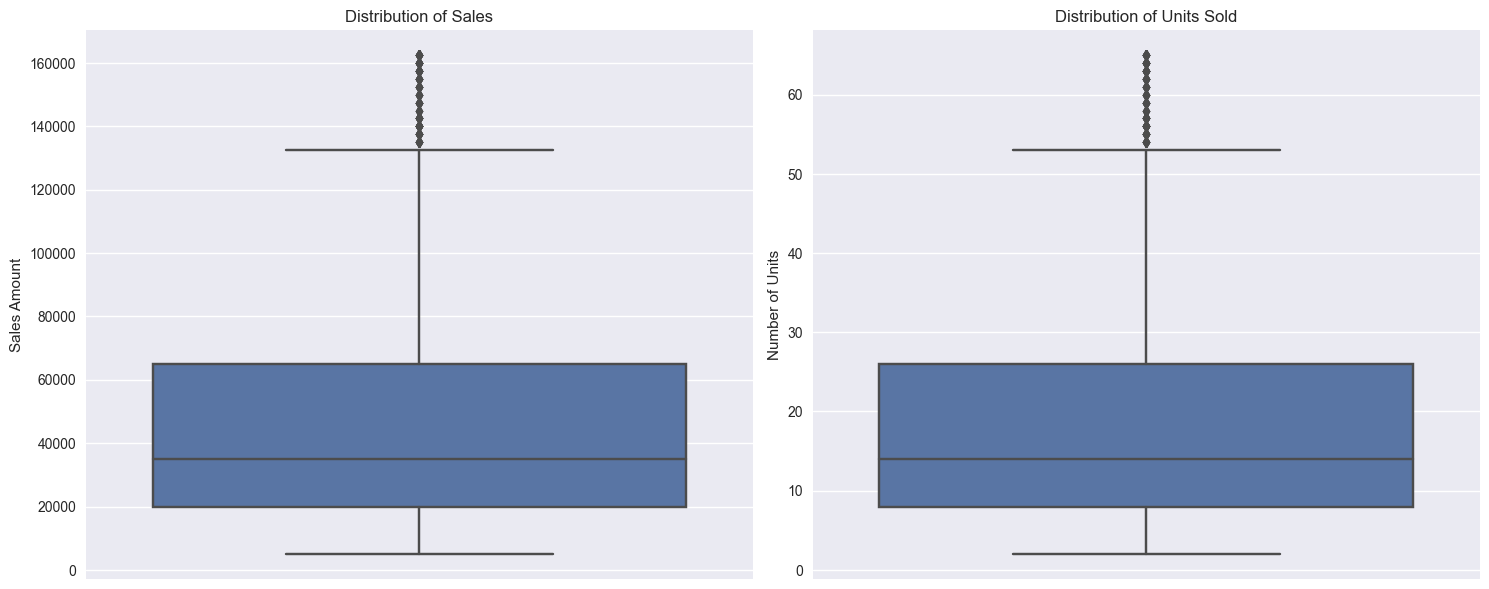

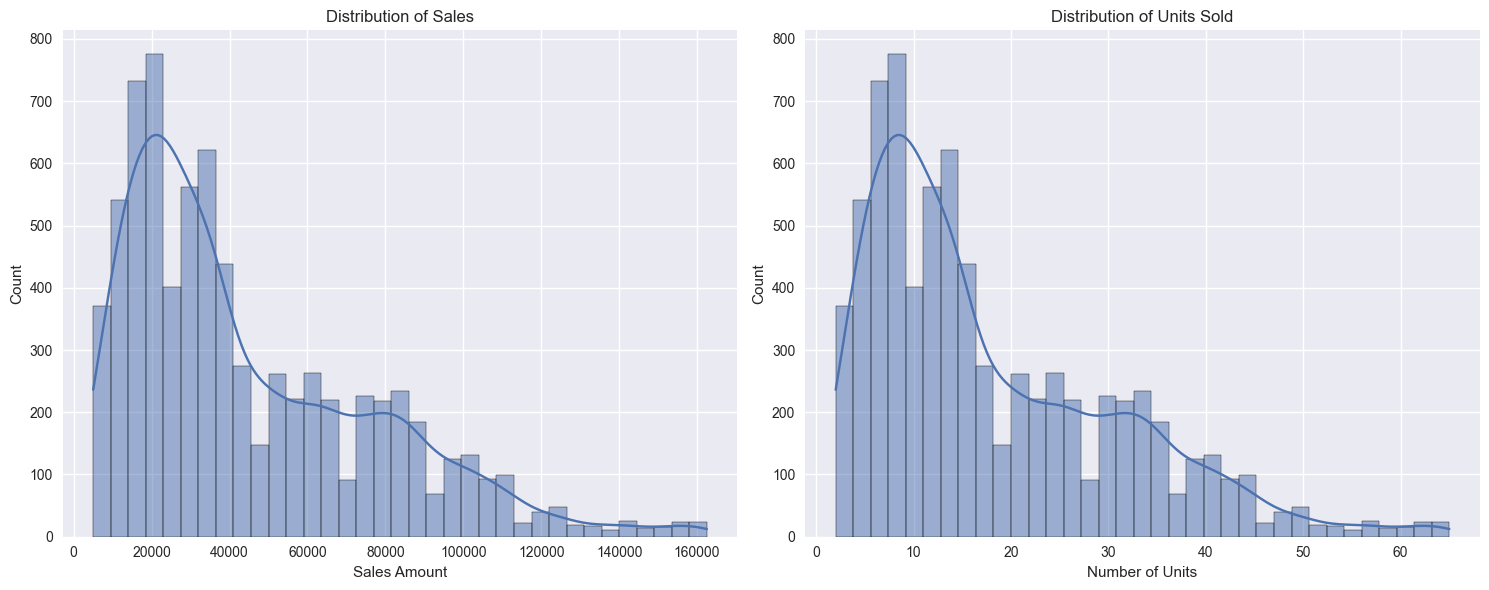

In [3]:
# Set up the plotting style
plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create box plots for Sales and Units
sns.boxplot(y='Sales', data=cleaned_data, ax=ax1)
ax1.set_title('Distribution of Sales')
ax1.set_ylabel('Sales Amount')

sns.boxplot(y='Unit', data=cleaned_data, ax=ax2)
ax2.set_title('Distribution of Units Sold')
ax2.set_ylabel('Number of Units')

plt.tight_layout()
plt.show()

# Create histograms for Sales and Units
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(cleaned_data['Sales'], kde=True, ax=ax1)
ax1.set_title('Distribution of Sales')
ax1.set_xlabel('Sales Amount')

sns.histplot(cleaned_data['Unit'], kde=True, ax=ax2)
ax2.set_title('Distribution of Units Sold')
ax2.set_xlabel('Number of Units')

plt.tight_layout()
plt.show()

### Box Plot Interpretation:
- Sales Distribution: Most sales fall between about $20,000 and $65,000, with a median around $35,000. There are numerous sales above $130,000, appearing as outliers.
- Units Distribution: Most transactions involve between 8 and 26 units, with a median around 14 units. Some transactions involve more than 50 units, shown as outliers.

### Histogram Interpretation:
- Sales Distribution: The histogram reveals a right-skewed distribution. Most sales cluster on the lower end, but there's a long tail stretching to the right, indicating some high-value sales.
- Units Distribution: Similarly, most transactions involve fewer units, but there are some high-volume transactions, as shown by the tail extending to the right.

These visualizations provide valuable insights into the overall distribution of our sales data. The presence of high-value and high-volume transactions suggests potential VIP customers or bulk orders that merit further investigation.

## Sales Performance by Customer Group

Now, I'll analyze how sales performance varies across different customer groups.

Statistics by Customer Group:
                Sales                              Unit                  
                 mean   median           std       mean median        std
Group                                                                    
Kids     45011.904762  35000.0  31871.491085  18.004762   14.0  12.748596
Men      45370.370370  35000.0  32177.180712  18.148148   14.0  12.870872
Seniors  44464.285714  35000.0  32195.360017  17.785714   14.0  12.878144
Women    45207.671958  35000.0  32781.639869  18.083069   14.0  13.112656

Highest performing group by average sales: Men
Lowest performing group by average sales: Seniors


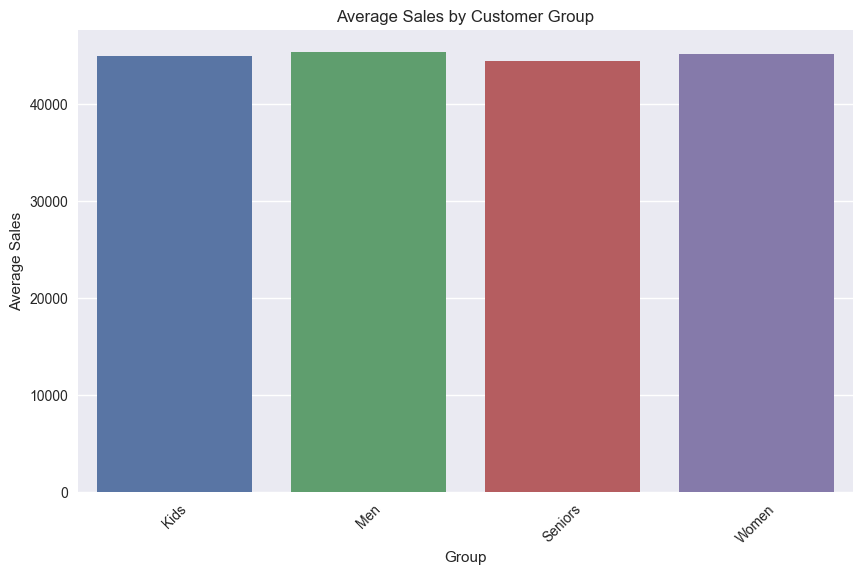


Overall Statistics:
               Sales       Unit
mean    45013.558201  18.005423
median  35000.000000  14.000000
std     32253.506944  12.901403


In [4]:
# Calculate statistics by customer group
group_stats = cleaned_data.groupby('Group')[['Sales', 'Unit']].agg(['mean', 'median', 'std'])
print("Statistics by Customer Group:")
print(group_stats)

# Identify highest and lowest performing groups
highest_sales_group = group_stats['Sales']['mean'].idxmax()
lowest_sales_group = group_stats['Sales']['mean'].idxmin()

print(f"\nHighest performing group by average sales: {highest_sales_group}")
print(f"Lowest performing group by average sales: {lowest_sales_group}")

# Visualize average sales by group
plt.figure(figsize=(10, 6))
sns.barplot(x=group_stats.index, y=group_stats['Sales']['mean'])
plt.title('Average Sales by Customer Group')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Compare group statistics to overall statistics
overall_stats = cleaned_data[['Sales', 'Unit']].agg(['mean', 'median', 'std'])
print("\nOverall Statistics:")
print(overall_stats)

### Key Findings:
1. Average Sales by Group:
   - Men: $45,370.37 (Highest)
   - Women: $45,207.67
   - Kids: $45,011.90
   - Seniors: $44,464.29 (Lowest)

2. Consistency Across Groups:
   - All groups have the same median sales ($35,000) and median units sold (14).
   - Standard deviations for both sales and units are very similar across groups.

### Interpretation:
- The differences in average sales between groups are relatively small (range of about $906).
- Sales patterns are remarkably consistent across all customer segments.
- This uniformity suggests that AAL's products have broad appeal across different customer groups.

### Business Implications:
1. AAL's current strategy appears to be equally effective across all customer segments.
2. There might be an opportunity to develop more targeted strategies to differentiate performance between groups, if aligned with business goals.
3. The consistency in sales patterns could be leveraged for forecasting and inventory management.

## Conclusion

### Summary of Key Findings:
1. Sales performance is remarkably consistent across all customer groups, with only minor variations in average sales.
2. The Men's group slightly outperforms others, while the Seniors group shows marginally lower average sales.
3. Sales and unit distributions are right-skewed, indicating the presence of some high-value and high-volume transactions.

### Implications for Australian Apparel Ltd:
1. The consistency in sales across groups suggests that AAL's current product range and marketing strategies have broad appeal.
2. There may be untapped potential for targeted marketing or product development to enhance performance in specific segments, particularly for Seniors.
3. The presence of high-value transactions across all groups indicates opportunities for VIP customer programs or bulk purchase incentives.

### Next Steps and Recommendations:
1. Conduct a time-series analysis to identify any seasonal trends or changes in group performance over time.
2. Investigate product-level data to understand if certain items drive the minor differences between groups.
3. Analyze customer behavior in more detail, focusing on factors like purchase frequency and customer lifetime value.
4. Consider developing targeted marketing campaigns or product lines to boost performance in the Seniors segment.
5. Explore the characteristics of high-value transactions to inform strategies for increasing average transaction values across all groups.

By implementing these recommendations, AAL can refine its strategies to capitalize on the strengths revealed by this analysis and address potential areas for improvement.